In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,validation_curve,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
email_rc=pd.read_csv('/home/vinod/Downloads/Spam.csv', sep=',')

In [3]:
email_rc

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
email=email_rc[["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "spam"]]

In [5]:
print(email.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [6]:
email_rc.shape

(4601, 58)

In [7]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [8]:
email.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [9]:
email.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [10]:
email['spam'].value_counts()/len(email)*100

0    60.595523
1    39.404477
Name: spam, dtype: float64

# Data divided into train and test data . X data passes through the standardscaler

In [11]:
X=email[["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]]
y=email['spam']

In [12]:
scaler=StandardScaler()

In [13]:
X=scaler.fit_transform(X)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

# Import SVC model and fit the model predictions,confusion matrix

In [15]:
from sklearn.svm import SVC

In [16]:
svc=SVC(C=1)

In [17]:
svc.fit(X_train,y_train)

SVC(C=1)

In [18]:
y_pred=svc.predict(X_test)

In [19]:
print(confusion_matrix(y_test,y_pred))

[[811  38]
 [ 61 471]]


# Print the accuracy,precision,recall scores

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [21]:
print("accuracyscore {:.4f}".format(accuracy_score(y_pred,y_test)))
print("precisionscore {:.4f}".format(precision_score(y_pred,y_test)))
print("recallscore {:.4f}".format(recall_score(y_pred,y_test)))

accuracyscore 0.9283
precisionscore 0.8853
recallscore 0.9253


In [22]:
specificity=477/float(471+38)

In [23]:
specificity

0.93713163064833

In [24]:
folds = KFold(n_splits=5,shuffle=True,random_state=4)

In [25]:
model = SVC(C=1,random_state=4)

In [26]:
cv_results =cross_val_score(model,X,y,cv=folds)

In [27]:
cv_results

array([0.92616721, 0.93152174, 0.93695652, 0.93586957, 0.92065217])

In [28]:
from numpy import mean

In [29]:
print('MeanAccuracy',mean(cv_results))

MeanAccuracy 0.9302334419109662


In [30]:
model_cv = GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},return_train_score=True, scoring='accuracy', verbose=1)


In [31]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [32]:
cv_results =pd.DataFrame(model_cv.cv_results_)

In [33]:
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.166264,0.002404,0.051657,0.000315,0.1,{'C': 0.1},0.895963,0.902174,0.906832,0.902174,...,0.905280,0.007795,5,0.912655,0.911879,0.912267,0.911102,0.906056,0.910792,0.002423
1,0.113778,0.002769,0.032265,0.001357,1,{'C': 1},0.917702,0.940994,0.920807,0.930124,...,0.929814,0.009440,2,0.951475,0.946040,0.949922,0.946040,0.945652,0.947826,0.002401
2,0.099630,0.003659,0.026521,0.000995,10,{'C': 10},0.908385,0.944099,0.933230,0.928571,...,0.930745,0.012368,1,0.975543,0.970885,0.973991,0.968944,0.971273,0.972127,0.002347
3,0.117725,0.007188,0.023643,0.001610,100,{'C': 100},0.913043,0.927019,0.936335,0.930124,...,0.928571,0.008562,3,0.989519,0.989907,0.989907,0.988354,0.987966,0.989130,0.000814
4,0.156579,0.020590,0.021827,0.001796,1000,{'C': 1000},0.908385,0.931677,0.922360,0.919255,...,0.920497,0.007440,4,0.996118,0.993789,0.994177,0.993789,0.994177,0.994410,0.000872


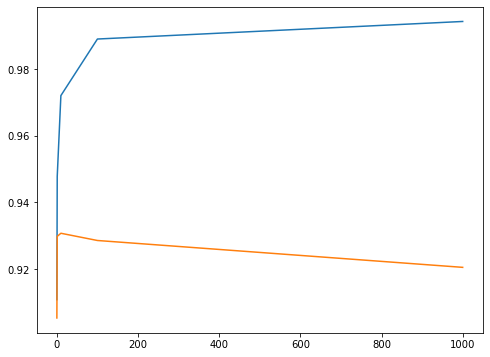

In [34]:
plt.figure(figsize=(8, 6))
C =[0.1, 1, 10, 100, 1000]
plt.plot(C,cv_results['mean_train_score'])
plt.plot(C,cv_results['mean_test_score'])

In [35]:
best_score = model_cv.score(X_train,y_train)

In [36]:
print('accuracyscore is',format(best_score))

accuracyscore is 0.9704968944099379


In [37]:
best_C =model_cv.best_params_

In [38]:
best_C

{'C': 10}

In [39]:
svc=SVC(C=10)

In [40]:
svc.fit(X_train,y_train)

SVC(C=10)

In [41]:
y_pred=svc.predict(X_test)

In [42]:
print(confusion_matrix(y_test,y_pred))

[[810  39]
 [ 57 475]]


In [43]:
print("accuracyscore {:.4f}".format(accuracy_score(y_pred,y_test)))
print("precisionscore {:.4f}".format(precision_score(y_pred,y_test)))
print("recallscore {:.4f}".format(recall_score(y_pred,y_test)))

accuracyscore 0.9305
precisionscore 0.8929
recallscore 0.9241


In [44]:
model=SVC(kernel='poly', degree=8, gamma="auto")
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       849
           1       0.91      0.20      0.33       532

    accuracy                           0.69      1381
   macro avg       0.79      0.60      0.56      1381
weighted avg       0.76      0.69      0.62      1381



In [45]:
model=SVC(kernel='rbf', gamma="auto")
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       849
           1       0.93      0.89      0.90       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [46]:
model=SVC(kernel='sigmoid', gamma="auto")
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       849
           1       0.86      0.87      0.86       532

    accuracy                           0.90      1381
   macro avg       0.89      0.89      0.89      1381
weighted avg       0.90      0.90      0.90      1381



In [47]:
model=SVC(kernel='linear', gamma="auto")
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       849
           1       0.92      0.89      0.91       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [48]:

grid=GridSearchCV(estimator=SVC(),param_grid=[{'C': [0.1, 1, 10, 100, 1000],'kernel':['rbf', 'poly', 'sigmoid'],'gamma':[1,0.1,0.01,0.001]}],refit=True,verbose=2,return_train_score=True)

In [49]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf', 'poly', 'sigmoid']}],
             return_train_score=True, verbose=2)

In [50]:
cv_result=pd.DataFrame(grid.cv_results_)

In [51]:
cv_result.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.300789,0.007012,0.094357,0.000434,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.602484,0.605590,...,0.604037,0.001389,58,0.605978,0.609472,0.605590,0.605590,0.606366,0.606599,0.001465
1,0.159775,0.032716,0.011137,0.000335,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.913043,0.905280,...,0.911491,0.009870,13,0.995730,0.996118,0.994565,0.995342,0.995730,0.995497,0.000527
2,0.164427,0.030062,0.028214,0.002808,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.810559,0.832298,...,0.805590,0.018977,40,0.803571,0.802795,0.771351,0.807842,0.772516,0.791615,0.016166
3,0.235989,0.001137,0.074591,0.000477,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.798137,0.809006,...,0.802484,0.009938,44,0.823758,0.823758,0.817158,0.832686,0.823758,0.824224,0.004943
4,0.138537,0.003412,0.020603,0.000221,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.869565,0.869565,...,0.873913,0.007440,29,0.917314,0.919643,0.914596,0.916925,0.920807,0.917857,0.002177


# Find the best params and best scores 

In [52]:
best_params=grid.best_params_

In [53]:
best_score=grid.score(X_test,y_test)

In [54]:
print('The best score is {:.4f}'.format(best_score))
print('The best hyperparametes is {:.4f}',(best_params))

The best score is 0.9348
The best hyperparametes is {:.4f} {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [55]:
model=SVC(C=100,gamma=0.01,kernel='rbf')

In [56]:
model.fit(X_train,y_train)

SVC(C=100, gamma=0.01)

In [57]:
prediction=model.predict(X_test)



In [58]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       849
           1       0.92      0.89      0.90       532

    accuracy                           0.93      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [59]:
print("accuracyscore {:.4f}".format(accuracy_score(y_pred,y_test)))
print("precisionscore {:.4f}".format(precision_score(y_pred,y_test)))
print("recallscore {:.4f}".format(recall_score(y_pred,y_test)))

accuracyscore 0.9305
precisionscore 0.8929
recallscore 0.9241


In [60]:
print(confusion_matrix(y_test,prediction))

[[807  42]
 [ 60 472]]
